<a href="https://colab.research.google.com/github/ferferreres/03MIAR-Algoritmos-de-Optimizacion/blob/main/Algoritmos_Fernando_Ferreres_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AG2 - Actividad Guiada 2
Nombre: Fernando Ferreres Caballero <br>

Link:   https://colab.research.google.com/drive/1Gh0gRLBKb0Z54yHiKc_UyukgaDKFkT6a?usp=sharing <br>

Github: https://github.com/ferferreres/03MIAR-Algoritmos-de-Optimizacion
<br>

In [1]:
import math

In [2]:
inf = float('inf')
TARIFAS = [[0, 5, 4, 3, inf, inf, inf],
           [inf, 0, inf, 2, 3, inf, 11],
           [inf, inf, 0, 1, inf, 4, 10],
           [inf, inf, inf, 0, 5, 6, 9],
           [inf, inf, inf, inf, 0, inf, 4],
           [inf, inf, inf, inf, inf, 0, 3],
           [inf, inf, inf, inf, inf, inf, 0]]

In [3]:
def Precios(TARIFAS):
  N = len(TARIFAS[0])

  PRECIOS = [ [9999] * N for i in [9999] * N]
  RUTA = [  [""] * N for i in [""] * N]

  for i in range(N - 1):
    for j in range(i + 1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
          MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j])
          RUTA[i][j] = k
        PRECIOS[i][j] = MIN
    
  return PRECIOS, RUTA

Precios(TARIFAS)


([[9999, 5, 4, 3, 8, 8, 11],
  [9999, 9999, inf, 2, 3, 8, 7],
  [9999, 9999, 9999, 1, 6, 4, 7],
  [9999, 9999, 9999, 9999, 5, 6, 9],
  [9999, 9999, 9999, 9999, 9999, inf, 4],
  [9999, 9999, 9999, 9999, 9999, 9999, 3],
  [9999, 9999, 9999, 9999, 9999, 9999, 9999]],
 [['', 0, 0, 0, 1, 2, 5],
  ['', '', 1, 1, 1, 3, 4],
  ['', '', '', 2, 3, 2, 5],
  ['', '', '', '', 3, 3, 3],
  ['', '', '', '', '', 4, 4],
  ['', '', '', '', '', '', 5],
  ['', '', '', '', '', '', '']])

In [4]:
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) + ', ' + str(RUTA[desde][hasta])

PRECIOS, RUTA = Precios(TARIFAS)
print("\nLa ruta es: ")
calcular_ruta(RUTA, 0, 6)


La ruta es: 


'0, 2, 5'

### Problema de Asignación de Tarea

In [5]:
#Asignacion de tareas - Ramificación y Poda

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [6]:
from itertools import permutations
import time

def calcular_tiempo(func):
    def wrapper(COSTES):
        start = time.time()
        ret = func(COSTES)
        end = time.time()
        print(end-start)
        return ret
    return wrapper

In [7]:
#Calculo del valor de una solucion parcial

def valor(S, COSTES):
    VALOR = 0
    for i in range(len(S)):
        VALOR += COSTES[S[i]][i]
    return VALOR

valor((0,1,2,3), COSTES)

73

In [8]:
@calcular_tiempo
def fuerza_bruta(COSTES):
    mejor_valor = 10e10
    mejor_solucion = ()

    for s in list(permutations(range(len(COSTES)))):
        valor_tmp = valor(s, COSTES)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s

    print("La mejor solución es: ", mejor_solucion, " con valor: ", mejor_valor)

fuerza_bruta(COSTES)

La mejor solución es:  (0, 3, 1, 2)  con valor:  61
0.007645130157470703


In [9]:
def CI(S, COSTES):
    VALOR = 0

    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]

    for i in range(len(S), len(COSTES)):
        VALOR += min([COSTES[j][i] for j in range(len(S), len(COSTES))])
    return VALOR 

def CS(S, COSTES):
    VALOR = 0

    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]

    for i in range(len(S), len(COSTES)):
        VALOR += max([COSTES[j][i] for j in range(len(S), len(COSTES))])
    return VALOR

CI((0,3,), COSTES)

75

In [10]:
def crear_hijos(NODO, N):
    HIJOS = []
    for i in range(N):
        if i not in NODO:
            HIJOS.append({'s':NODO + (i,)})
    return HIJOS

crear_hijos((0,), 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [11]:
@calcular_tiempo
def ramificacion_y_poda(COSTES):

    DIMENSION = len(COSTES)
    MEJOR_SOLUCION=tuple(i for i in range(len(COSTES)))
    CotaSup = valor(MEJOR_SOLUCION, COSTES)

    NODOS = []
    NODOS.append({'s':(), 'ci':CI((), COSTES)})

    iteracion = 0

    while(len(NODOS) > 0):

        iteracion += 1

        nodo_prometedor = [min(NODOS, key=lambda x:x['ci'])][0]['s']
        
        HIJOS = [{'s':x['s'], 'ci':CI(x['s'], COSTES)} for x in crear_hijos(nodo_prometedor, DIMENSION)]
        NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION]
        
        if len(NODO_FINAL) > 0:
            if NODO_FINAL[0]['ci'] < CotaSup:
                CotaSup = NODO_FINAL[0]['ci']
                MEJOR_SOLUCION = NODO_FINAL

        HIJOS = [x for x in HIJOS if x['ci'] < CotaSup] #PODA
        NODOS.extend(HIJOS)

        NODOS = [x for x in NODOS if x['s'] != nodo_prometedor]
    
    print('La solucion final es: ', MEJOR_SOLUCION, ' en ', iteracion, ' iteraciones para dimension: ', DIMENSION)

ramificacion_y_poda(COSTES)

La solucion final es:  [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones para dimension:  4
0.0007798671722412109


In [12]:
from random import randint

for i in range(5, 12):
    try:
        COSTES_i = [[randint(10,40) for x in range(i)] for y in range(i)]
        print("-------------FUERZA BRUTA PARA ", i, " DIMENSIONES--------------")
        fuerza_bruta(COSTES_i)
        print("-------------RAMIFICACION Y PODA PARA " , i, " DIMENSIONES--------------")
        ramificacion_y_poda(COSTES_i)
    except MemoryError:
        print('Fallo de memoria')

-------------FUERZA BRUTA PARA  5  DIMENSIONES--------------
La mejor solución es:  (3, 4, 0, 2, 1)  con valor:  76
0.0008623600006103516
-------------RAMIFICACION Y PODA PARA  5  DIMENSIONES--------------
La solucion final es:  [{'s': (2, 0, 3, 1, 4), 'ci': 83}]  en  30  iteraciones para dimension:  5
0.0125579833984375
-------------FUERZA BRUTA PARA  6  DIMENSIONES--------------
La mejor solución es:  (4, 0, 1, 2, 3, 5)  con valor:  88
0.0016906261444091797
-------------RAMIFICACION Y PODA PARA  6  DIMENSIONES--------------
La solucion final es:  [{'s': (1, 2, 3, 4, 0, 5), 'ci': 88}]  en  73  iteraciones para dimension:  6
0.0034728050231933594
-------------FUERZA BRUTA PARA  7  DIMENSIONES--------------
La mejor solución es:  (2, 6, 3, 5, 4, 0, 1)  con valor:  93
0.03243708610534668
-------------RAMIFICACION Y PODA PARA  7  DIMENSIONES--------------
La solucion final es:  [{'s': (5, 3, 0, 2, 1, 4, 6), 'ci': 99}]  en  70  iteraciones para dimension:  7
0.029801607131958008
----------

Dados los resultados, fuerza bruta resulta la mejor opción en matrices de dimensiones inferiores a 12.

En la dimension 12 tenemos un error de memoria (el cual se puede comprobar cambiando el rango del bucle) al usar el algoritmo de fuerza bruta. Por lo que resulta inservible.

In [ ]:
for i in range(12, 14):
    try:
        COSTES_i = [[randint(10,40) for x in range(i)] for y in range(i)]
        print("-------------RAMIFICACION Y PODA PARA " , i, " DIMENSIONES--------------")
        ramificacion_y_poda(COSTES_i)
    except MemoryError:
        print('Fallo de memoria')

Tratando de llevar al limite al algoritmo de ramificación y poda podemos comprobar como se necesita casi un minuto para matrices de dimension 13. 
Con 14 dimesiones y tras mas de 10 minutos tratando de ejectuar el algoritmo realizo una interrupción del codigo y entiendo que el algoritmo es inservible o por lo menos ya no es suficientemente rapido. 

In [14]:
import math 
import matplotlib.pyplot as plt
import numpy as np

import random

In [15]:
f = lambda X: X[0]**2 + X[1]**2
df = lambda X: [2*X[0], 2*X[1]]

df([1, 2])

[2, 4]

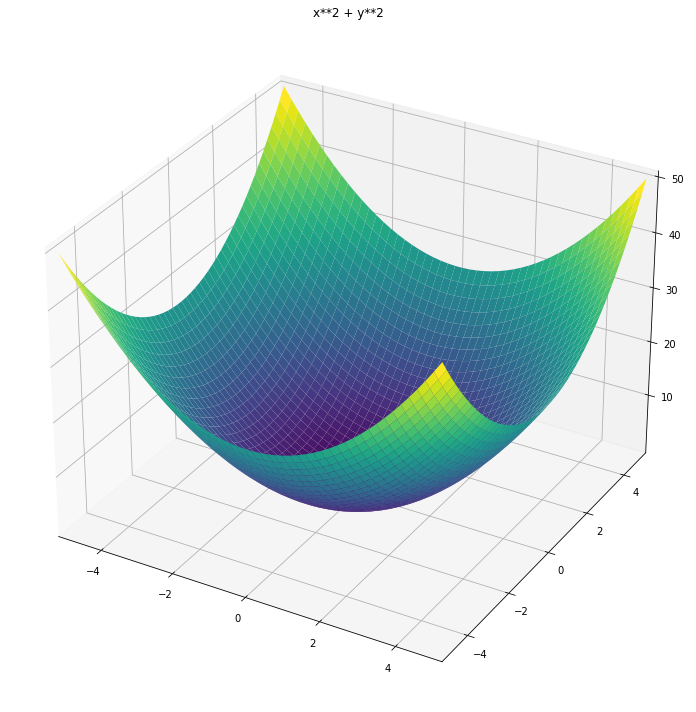

In [16]:
from sympy import symbols, cos, sin
from sympy.plotting import plot, plot3d
x, y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

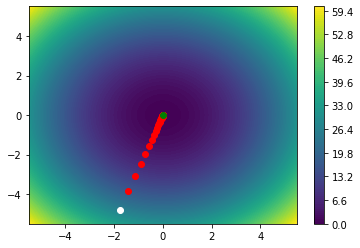

Solución:  [-2.5359571803957853e-05, -6.886712219575493e-05] 5.3857884016051355e-09


In [17]:
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x,y])

plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c = "white")

TA=.1

for _ in range(50):
    grad = df(P)

    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]

    plt.plot(P[0], P[1], "o", c = "red")

plt.plot(P[0], P[1], "o", c = "green")
plt.show()
print("Solución: ", P, f(P))

In [18]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]))
df = lambda X: [X[0] * math.cos(2*X[0] - math.exp(X[1]) + 1) * math.cos( (X[0]**2 / 2) - (X[1]**2 / 4) + 3) - 2 * math.sin(2 * X[0] - math.exp(X[1]) + 1) * math.sin((X[0]**2 / 2) - (X[1]**2 / 4) + 3), math.exp(X[1])*math.sin(2*X[0] - math.exp(X[1]) + 1) * math.sin((X[0]**2 / 2) - (X[1]**2 / 4) + 3) - (X[1]*math.cos(2*X[0] - math.exp(X[1]) + 1) * math.cos((X[0]**2 / 2) - (X[1]**2 / 4) + 3)) / 2]

 
df([1,2])

[-0.8803745550791662, 3.9384502467765357]

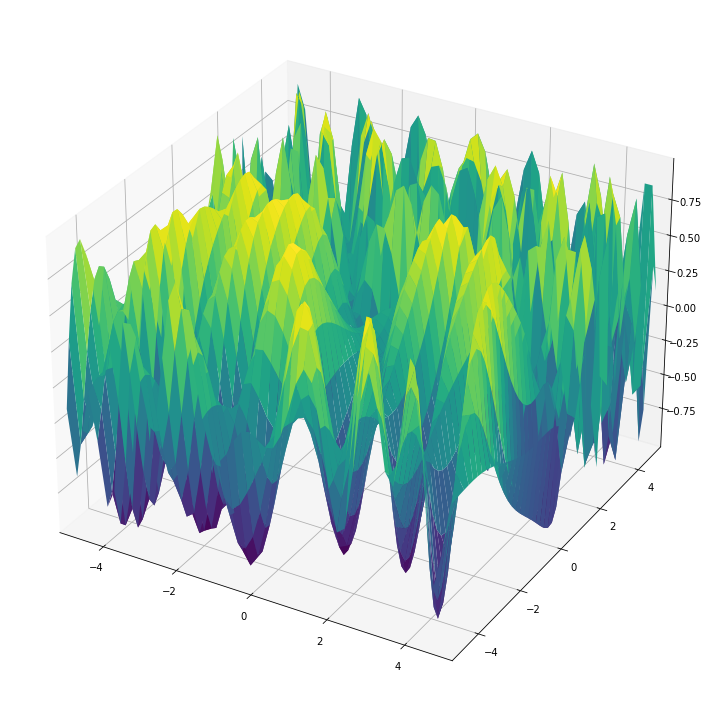

In [19]:
from sympy import cos, sin, exp

x, y = symbols('x y')
plot3d(sin((.5 * x**2) - (.25 * y**2) + 3)*cos(2*x + 1 - exp(y)),
       (x,-5,5),(y,-5,5),
       size=(10,10))

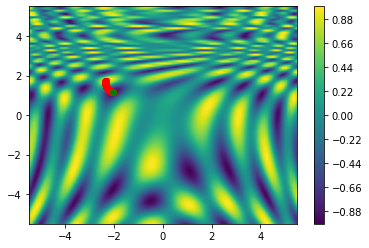

Solución:  [-2.050805435883005, 1.15602966382204] -0.9984001526025821


In [21]:
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x,y])

plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c = "white")

TA=.01

for _ in range(50):
    grad = df(P)

    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]

    plt.plot(P[0], P[1], "o", c = "red")

plt.plot(P[0], P[1], "o", c = "green")
plt.show()
print("Solución: ", P, f(P))